In [1]:
# model implementation
from ml.models.statistical import GaussianDiscriminantAnalysis
from ml.models.clustering import KNN
from ml.functions.distance import EuclideanDistance

# model selection
from ml.model_selection import GridSearchCV
from ml.functions.metrics.classification import F1Score, BinaryAccuracy
from ml.stats import ClassificationStats

# data manipulation
from ml.dataset import load_csv, split_train_test
from ml.algorithms.normalization import MinMaxScaler

# Utility
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(25)

## Load dataset

In [2]:
X, y = load_csv('./datasets/kc2.csv')

y = y.astype(int).squeeze()
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.8, shuffle=True)

## Q1 a,b - K-Nearest Neighbors (KNN)

### Grid search with cross validation and k-fold(k=10) for KNN(k=1,3,5,7)

In [29]:
grid = GridSearchCV(stats_generator=ClassificationStats)

for k in [1, 3, 5, 7]:
    grid.add(KNN, {"k": k, "distance": EuclideanDistance, "data_scaler": MinMaxScaler})

print("Best configuration:", grid.search(X_train, y_train, num_folds=10, score=F1Score(), score_minimize=False, shuffle=False))

Best configuration: (<class 'ml.models.clustering.KNN'>, {'k': 5, 'distance': <class 'ml.functions.distance.EuclideanDistance'>, 'data_scaler': <class 'ml.algorithms.normalization.MinMaxScaler'>})


### Performance of the best model on the test dataset

In [30]:

best_knn = grid.best_model(**grid.best_model_params)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

print("Accuracy:", BinaryAccuracy().measure(y_test, y_pred))
print("F1-score:", F1Score().measure(y_test, y_pred))

Accuracy: 0.8285714285714286
F1-score: 0.5263157894736842


### Report K-fold mean +- standard deviation for: F1-score, Accuracy, Recall and Precision

F1
	0: 0.42835952283011103 +- 0.16989480080646485
	1: 0.5054842876421823 +- 0.1774160785669654
	2: 0.5159819966456121 +- 0.19132155021570116
	3: 0.4810098673256567 +- 0.21493168605008695
RECALL
	0: 0.4712121212121212 +- 0.19717471847359724
	1: 0.48613636363636364 +- 0.18628479793378333
	2: 0.47780303030303034 +- 0.18733917191866167
	3: 0.4378030303030303 +- 0.1992992919189938
PRECISION
	0: 0.4148068598068598 +- 0.18443823102380463
	1: 0.5636904761904762 +- 0.22594049469463665
	2: 0.5845346320346321 +- 0.22255964715437884
	3: 0.5676190476190477 +- 0.24614073366871858
BINARY_ACCURACY
	0: 0.7628339140534262 +- 0.04338814721892593
	1: 0.8325203252032521 +- 0.05143305122405972
	2: 0.8421602787456447 +- 0.04832470548938935
	3: 0.8350174216027876 +- 0.05298284033037701


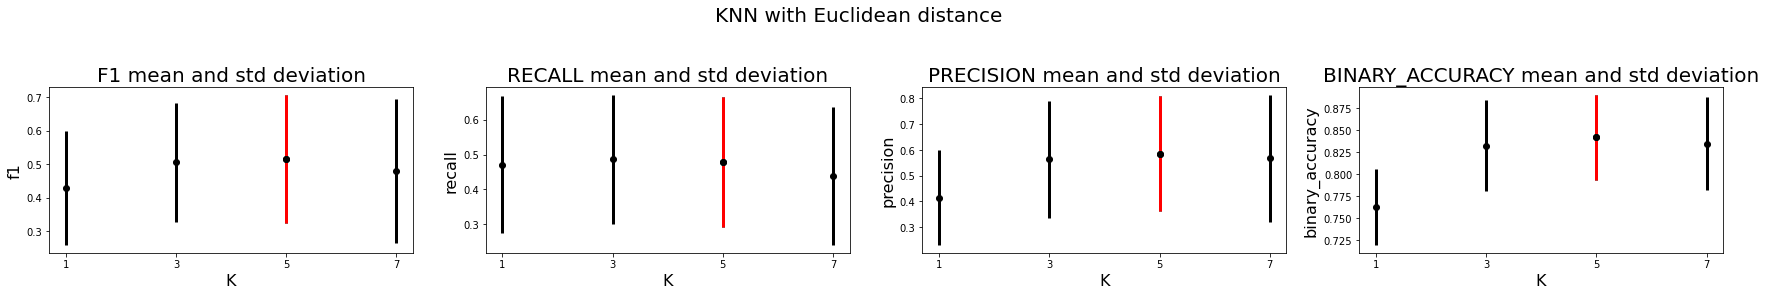

In [34]:
num_candidates = len(grid.candidates)
k=0
plt.figure(figsize=(30, 4))
plt.suptitle("KNN with Euclidean distance", fontsize=20)
plt.subplots_adjust(top=0.7)
for metric in ['f1', 'recall', 'precision', 'binary_accuracy']:
    means = []
    std = []
    
    for i in range(num_candidates):
        means.append(np.mean(grid.stats[i].stats["values"][metric]))
        std.append(np.std(grid.stats[i].stats["values"][metric]))

    plt.subplot(1, 4, k+1)
    plt.errorbar(np.arange(num_candidates), means, std, fmt='ok', lw=3)
    plt.errorbar(grid.index_of_best, means[grid.index_of_best], std[grid.index_of_best], ecolor='red', fmt='ok', lw=3)
    
    plt.title(metric.upper() + " mean and std deviation", fontsize=20)
    plt.xticks(np.arange(num_candidates), labels=np.arange(1, num_candidates*2, 2))
    plt.xlabel("K", fontsize=16)
    plt.ylabel(metric, fontsize=16)

    candidates = np.arange(num_candidates)
    print(metric.upper())
    for c in range(num_candidates):
        print(f"\t{candidates[c]}:", means[c], "+-", std[c])
    
    k+=1